<a href="https://colab.research.google.com/github/LilySu/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/Lily_Su_DS3_Unit_1_Sprint_Challenge_3_Data_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 3

# Data Storytelling

In this sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

# Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

# Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

**Optional Bonus Challenge:** Do additional insightful data exploration.

In [58]:
O_by_yr = pd.crosstab(df['Year'], df['Occupation'], normalize='index')
O_by_yr

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.903614,0.012048,0.066265,0.018072
2000,0.739645,0.082840,0.124260,0.053254
2001,0.726115,0.038217,0.197452,0.038217
2002,0.622642,0.069182,0.264151,0.044025
2003,0.560241,0.102410,0.246988,0.090361
2004,0.384146,0.225610,0.274390,0.115854
2005,0.370370,0.160494,0.333333,0.135802
2006,0.360248,0.192547,0.291925,0.155280
2007,0.255319,0.170213,0.333333,0.241135


# Part 2 — Recreate this explanatory visualization:

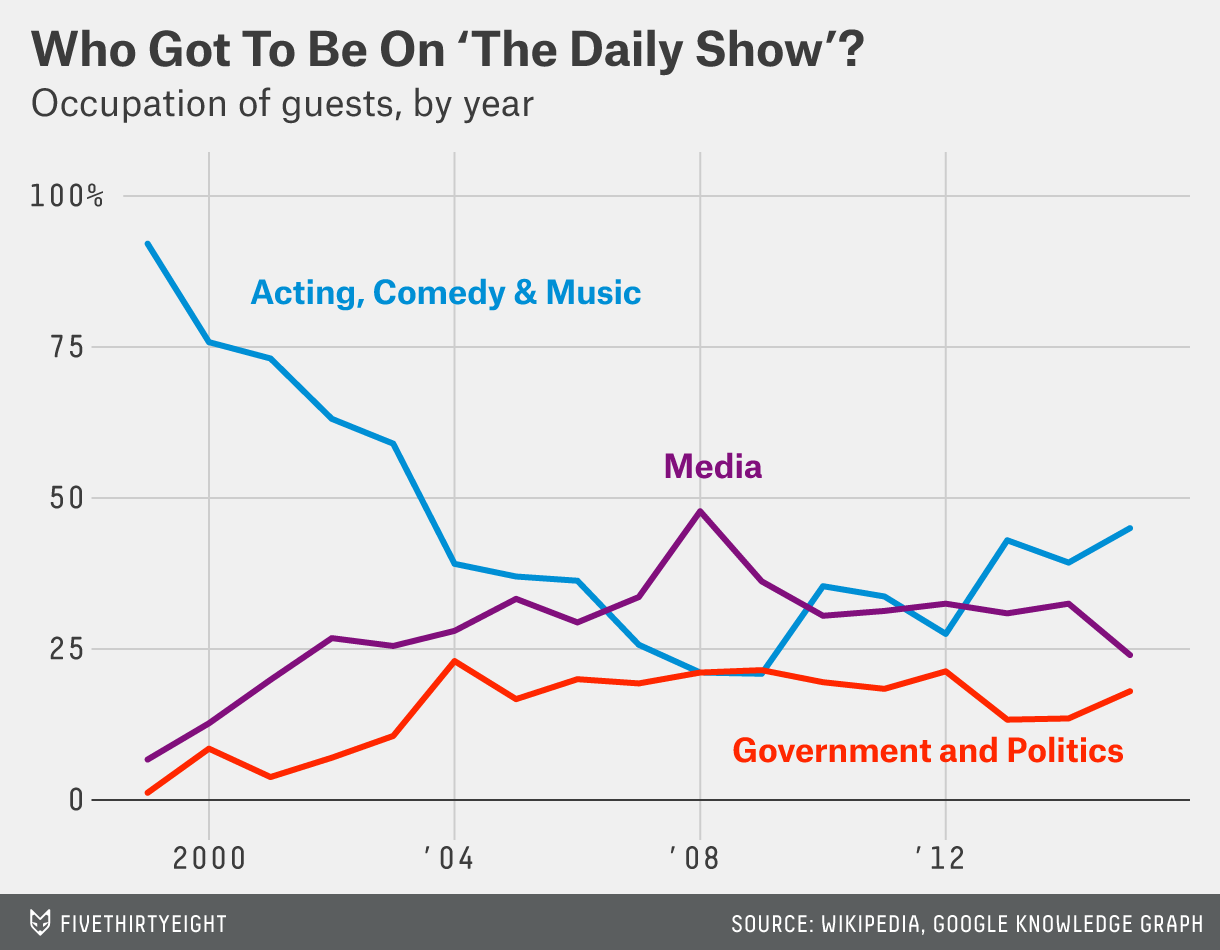

In [59]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

In [60]:
O_by_yr['A'] =  pd.Series(["{0:.2f}".format(val * 100) for val in O_by_yr['Acting, Comedy & Music']], index = O_by_yr.index)
O_by_yr['G'] =  pd.Series(["{0:.2f}".format(val * 100) for val in O_by_yr['Government and Politics']], index = O_by_yr.index)
O_by_yr['M'] =  pd.Series(["{0:.2f}".format(val * 100) for val in O_by_yr['Media']], index = O_by_yr.index)
O_by_yr = O_by_yr.astype(np.float16)
O_by_yr

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other,A,G,M
Year,,,,,,,
1999,0.903809,0.012047,0.066284,0.018066,90.375000,1.200195,6.628906
2000,0.739746,0.082825,0.124268,0.053253,73.937500,8.281250,12.429688
2001,0.726074,0.038208,0.197510,0.038208,72.625000,3.820312,19.750000
2002,0.622559,0.069153,0.264160,0.044037,62.250000,6.921875,26.421875
2003,0.560059,0.102417,0.246948,0.090332,56.031250,10.242188,24.703125
2004,0.384033,0.225586,0.274414,0.115845,38.406250,22.562500,27.437500
2005,0.370361,0.160522,0.333252,0.135742,37.031250,16.046875,33.343750
2006,0.360352,0.192505,0.291992,0.155273,36.031250,19.250000,29.187500
2007,0.255371,0.170166,0.333252,0.241089,25.531250,17.015625,33.343750


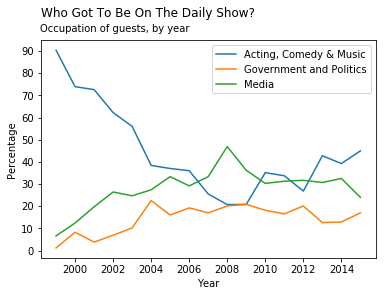

In [61]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(O_by_yr['A'], label='Acting, Comedy & Music')
plt.plot(O_by_yr['G'], label='Government and Politics')
plt.plot(O_by_yr['M'], label='Media')
L=plt.legend()
L.get_texts()[0].set_text('make it short')
plt.ylabel('Percentage')
plt.xlabel('Year')
plt.title('Who Got To Be On The Daily Show?',loc='left', y=1.08)
plt.figtext(.47,.91,"Occupation of guests, by year",fontsize=10,ha='right')
plt.yticks(np.arange(0, 100, step=10))
plt.legend()
plt.show()

# Part 3 — Who were the top 10 guests on _The Daily Show_?

**Make a plot** that shows their names and number of appearances.

**Add a title** of your choice.

**Expectations:** It's ok to make a simple, quick plot: exploratory, instead of explanatory. 

**Optional Bonus Challenge:** You can change aesthetics and add more annotation. For example, in a relevant location, could you add the text "19" to show that Fareed Zakaria appeared 19 times on _The Daily Show_? (And so on, for each of the top 10 guests.)

In [0]:
sorted = df['Guest'].value_counts()

In [63]:
my_list = sorted.tolist()
just_10_num = my_list[:10]
print(just_10_num)


[19, 17, 16, 13, 13, 12, 10, 10, 10, 10]


In [64]:
sortedlist = sorted.reset_index()
sortedlist

,index,Guest
0,Fareed Zakaria,19
1,Denis Leary,17
2,Brian Williams,16
3,Paul Rudd,13
4,Ricky Gervais,13
5,Tom Brokaw,12
6,Bill O'Reilly,10
7,Reza Aslan,10
8,Will Ferrell,10
9,Richard Lewis,10


In [0]:
names_top10 = sortedlist.rename(index=str, columns={"index": "names"})


In [66]:
sortedlist_list = sortedlist['index'].tolist()
print(sortedlist_list)

['Fareed Zakaria', 'Denis Leary', 'Brian Williams', 'Paul Rudd', 'Ricky Gervais', 'Tom Brokaw', "Bill O'Reilly", 'Reza Aslan', 'Will Ferrell', 'Richard Lewis', 'Sarah Vowell', 'Ben Affleck', 'Adam Sandler', 'Maggie Gyllenhaal', 'Mike Huckabee', 'Louis C.K.', 'Jeff Garlin', 'Samuel L. Jackson', 'Colin Firth', 'Michael Moore', 'Doris Kearns Goodwin', 'Bill Clinton', 'Bob Dole', 'Steve Carell', 'Sen. John McCain', 'Paul Giamatti', 'Elizabeth Warren', 'Rachel Maddow', 'Madeleine Albright', 'Bill Kristol', 'Jake Gyllenhaal', 'Neil deGrasse Tyson', 'Andrew Napolitano', 'Newt Gingrich', 'Jon Meacham', 'Ted Koppel', 'Austan Goolsbee', 'Tim Gunn', 'Martin Short', 'Kirsten Gillibrand', 'Colin Quinn', 'Seth Rogen', 'Seth Green', 'Ed Gillespie', 'Al Franken', 'Richard Belzer', 'David Cross', 'Jamie Foxx', 'Walter Isaacson', 'Al Gore', 'Johnny Knoxville', 'Jerry Seinfeld', 'Cameron Diaz', 'Michael Beschloss', 'Rachel Weisz', 'Jason Bateman', 'John McCain', 'Calvin Trillin', 'Sandra Bullock', 'Arian

In [67]:
just_10_ppl = sortedlist_list[:10]
print(just_10_ppl)

['Fareed Zakaria', 'Denis Leary', 'Brian Williams', 'Paul Rudd', 'Ricky Gervais', 'Tom Brokaw', "Bill O'Reilly", 'Reza Aslan', 'Will Ferrell', 'Richard Lewis']


In [68]:
df['Guest'].value_counts().head().plot.bar 

<bound method SeriesPlotMethods.bar of <pandas.plotting._core.SeriesPlotMethods object at 0x7f3b6bb9b1d0>>

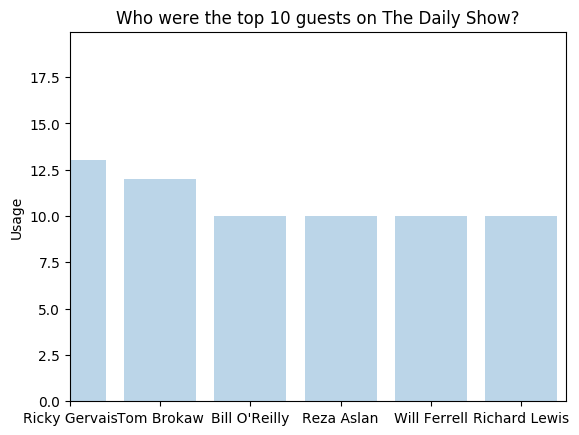

In [69]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = just_10_ppl
y_pos = np.arange(len(objects))
performance = just_10_num
 
plt.bar(y_pos, performance, align='center', alpha=0.3)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Who were the top 10 guests on The Daily Show?')
plt.xlim(0+4, 10-0.5)
 
plt.show()

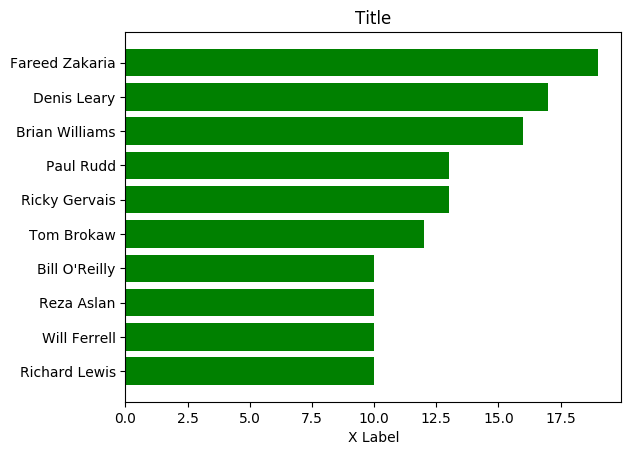

In [72]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcdefaults() #styling
fig, ax = plt.subplots() #new instance of fig and ax

# Fixing random state for reproducibility
np.random.seed(19680801)

# Example data
people = just_10_ppl
y_pos = np.arange(len(people))
performance = just_10_num

ax.barh(y_pos, performance, align='center', #plot our bars with error bars
        color='green', ecolor='black')
ax.set_yticks(y_pos) #Set ticks along left spine spaced by number of categories
ax.set_yticklabels(people) #label our ticks
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('X Label')
ax.set_title('Title')

plt.show()